In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

In [3]:
def log_pi(x): #target N(0,1)
    return stats.norm.logpdf(x)

def metropolis_kernel(x, tau=0.1):
    y = x + tau * np.random.randn() # I add a N(0, tau^2) to x
    lp = log_pi(y) - log_pi(x)
    u = np.random.rand()
    if np.log(u) < lp:
        return y
    else:
        return x

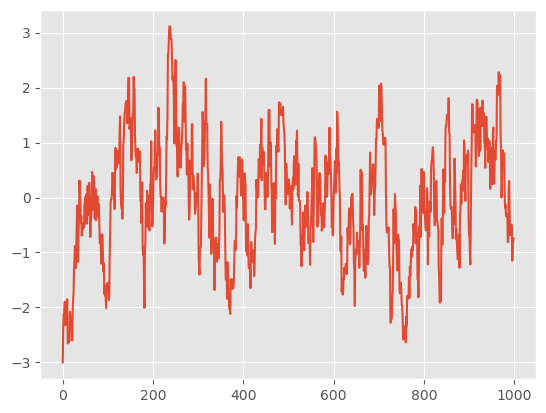

In [19]:
N = 1_000
chain = np.zeros(N)
chain[0]= -3.
for n in range(1, N):
    chain[n] = metropolis_kernel(chain[n-1], tau=.5)

plt.style.use('ggplot')
plt.plot(chain)

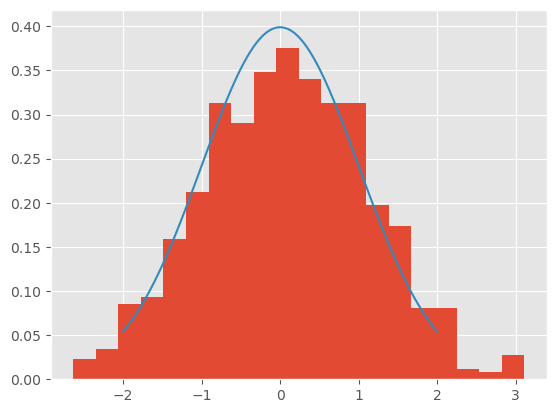

In [20]:
burnin = 100
plt.hist(chain[burnin:], 20, density=True);
xx = np.linspace(-2, 2., 100)
plt.plot(xx, stats.norm.pdf(xx))

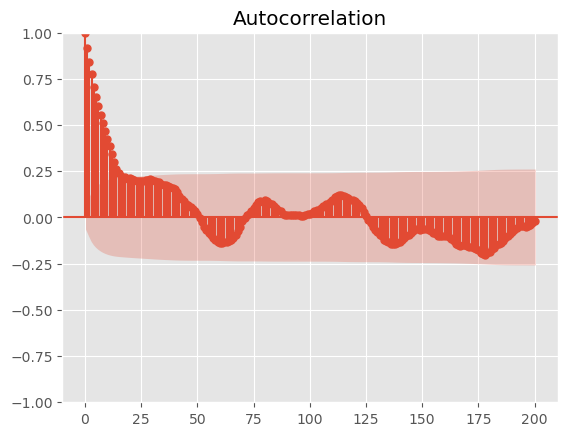

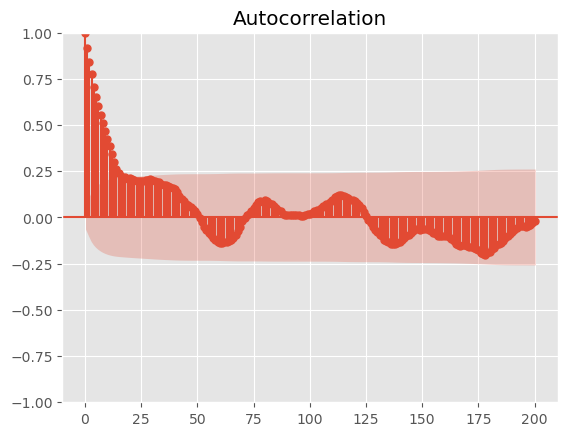

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(chain[burnin:], lags=200)